In [2]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay,classification_report
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, ADASYN

In [121]:
df = pd.read_csv('data.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [122]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [123]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [124]:
df.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

In [125]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [126]:
#Duplicados
df.duplicated().value_counts()

False    569
Name: count, dtype: int64

In [127]:
#Drop duplicados
df.drop_duplicates(inplace=True)

In [128]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [129]:
#Eliminamos variables que producen colinealidad
df.drop(['id','Unnamed: 32'], axis=1, inplace=True) 

C:\Users\guido\AppData\Local\Temp\ipykernel_2304\1428994847.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df.diagnosis,


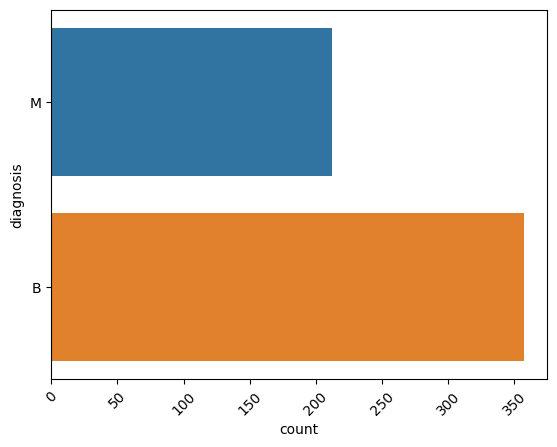

In [130]:
sns.countplot(df.diagnosis, 
              palette='tab10')
plt.xticks(rotation=45)
plt.show()

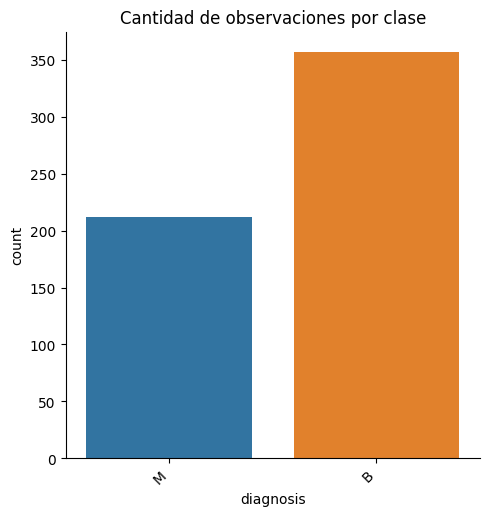

In [131]:
ax = sns.catplot(
    data=df, 
    x='diagnosis', 
    kind='count',
    hue='diagnosis'
    )
plt.xticks(rotation=45, ha='right')
plt.title("Cantidad de observaciones por clase");

In [132]:
#balanceo
undersample = RandomUnderSampler(random_state=42)

In [133]:
X = df.drop('diagnosis',axis=1)
y = df.diagnosis
X_over , y_over = undersample.fit_resample(X,y)

C:\Users\guido\AppData\Local\Temp\ipykernel_2304\4057735474.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y_over,


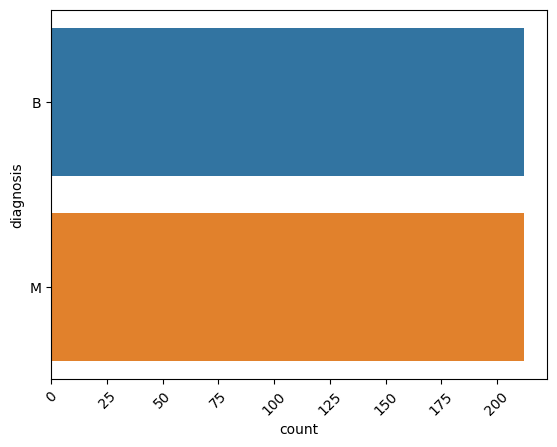

In [134]:
sns.countplot(y_over, 
              palette='tab10'
             )
plt.xticks(rotation=45)
plt.show()

In [135]:
y_over

395    B
110    B
481    B
493    B
136    B
      ..
563    M
564    M
565    M
566    M
567    M
Name: diagnosis, Length: 424, dtype: object

In [136]:
X_over

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
395,14.060,17.18,89.75,609.1,0.08045,0.05361,0.026810,0.03251,0.1641,0.05764,...,14.92,25.34,96.42,684.5,0.10660,0.12310,0.08460,0.07911,0.2523,0.06609
110,9.777,16.99,62.50,290.2,0.10370,0.08404,0.043340,0.01778,0.1584,0.07065,...,11.05,21.47,71.68,367.0,0.14670,0.17650,0.13000,0.05334,0.2533,0.08468
481,13.900,19.24,88.73,602.9,0.07991,0.05326,0.029950,0.02070,0.1579,0.05594,...,16.41,26.42,104.40,830.5,0.10640,0.14150,0.16730,0.08150,0.2356,0.07603
493,12.460,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,0.06013,...,13.19,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
136,11.710,16.67,74.72,423.6,0.10510,0.06095,0.035920,0.02600,0.1339,0.05945,...,13.33,25.48,86.16,546.7,0.12710,0.10280,0.10460,0.06968,0.1712,0.07343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.317400,0.14740,0.2149,0.06879,...,24.29,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873
564,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.243900,0.13890,0.1726,0.05623,...,25.45,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
565,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.09791,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
566,16.600,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,0.1590,0.05648,...,18.98,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [137]:
#Eliminamos variables que producen colinealidad
#X_over.drop(['id','Unnamed: 32'], axis=1, inplace=True) 

In [138]:
#Balanceo con smote()
oversample = SMOTE()
x_rsmote, y_rsmote = oversample.fit_resample(X,y)

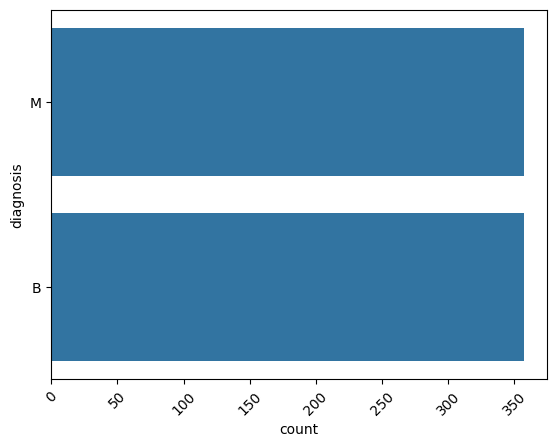

In [139]:
sns.countplot(y_rsmote)
plt.xticks(rotation=45)
plt.show()

In [140]:
#Conversión a numéricos el label CLass
list(np.unique(y_over)) #Muetra la lista sin repeticiones
y_over.replace(['M', 'B'], [1,2], inplace=True) #M=1 Maligno B=2 Benigno

C:\Users\guido\AppData\Local\Temp\ipykernel_2304\4005014774.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_over.replace(['M', 'B'], [1,2], inplace=True) #M=1 Maligno B=2 Benigno


In [141]:
list(np.unique(y_over))

[1, 2]

In [142]:
#Análisis exploratorio de datos
df_dea = X_over
df_dea['diagnosis'] = y_over

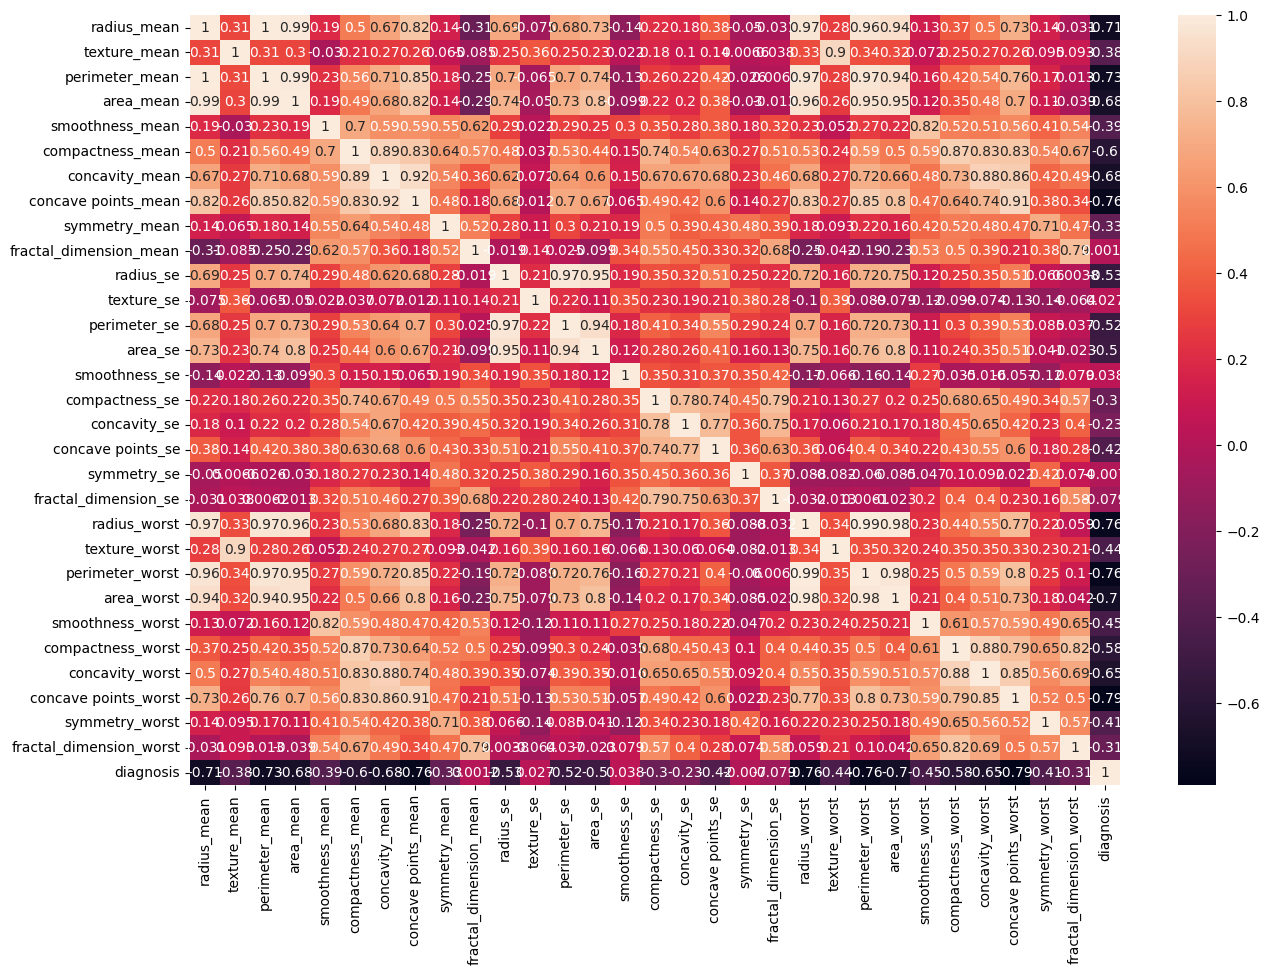

In [143]:
plt.figure(figsize=(15,10))
sns.heatmap(df_dea.corr(), annot=True)
plt.show()

In [112]:
# df_dea.drop('Class', axis=1, inplace=True)

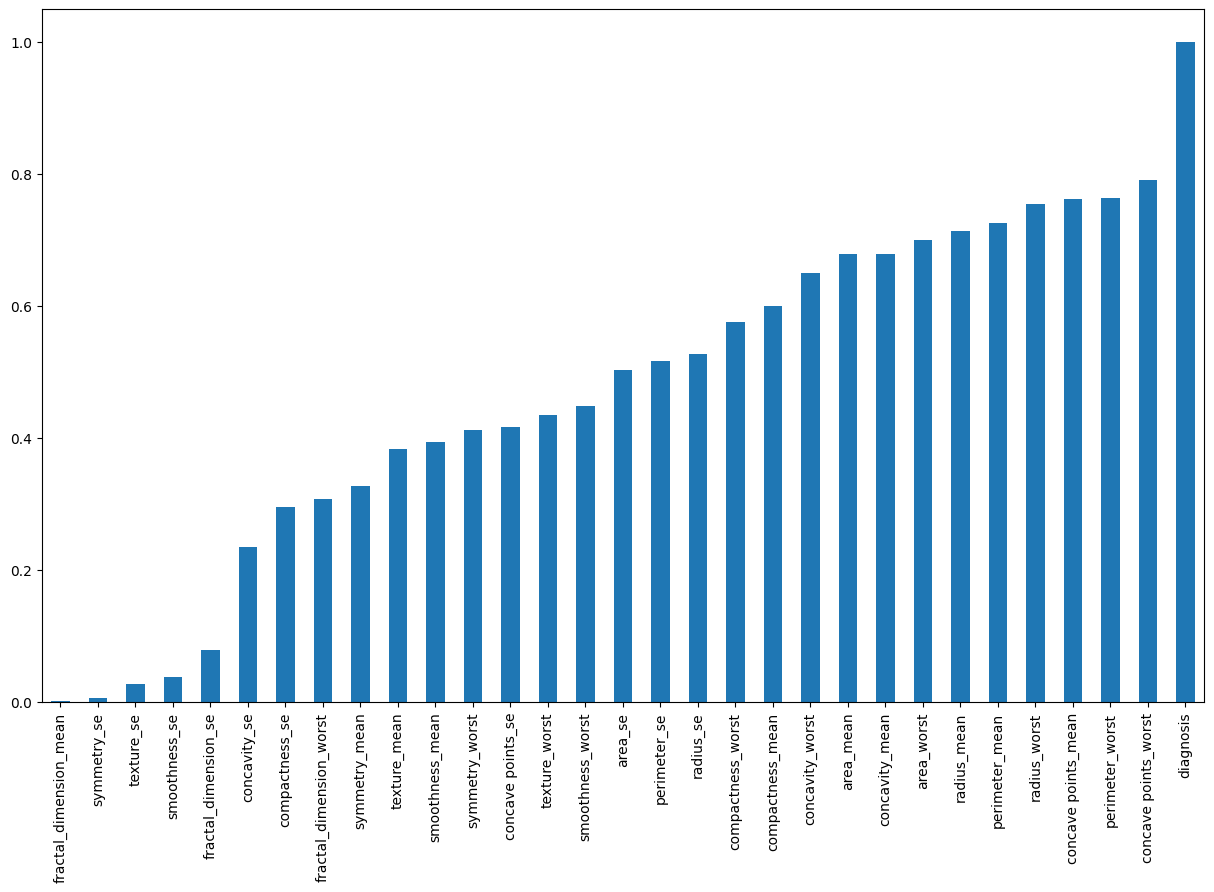

In [113]:
fig = plt.figure(figsize=(15,9))
df_dea.corr()['diagnosis'].abs().sort_values(ascending=True).plot(kind='bar')
plt.show()

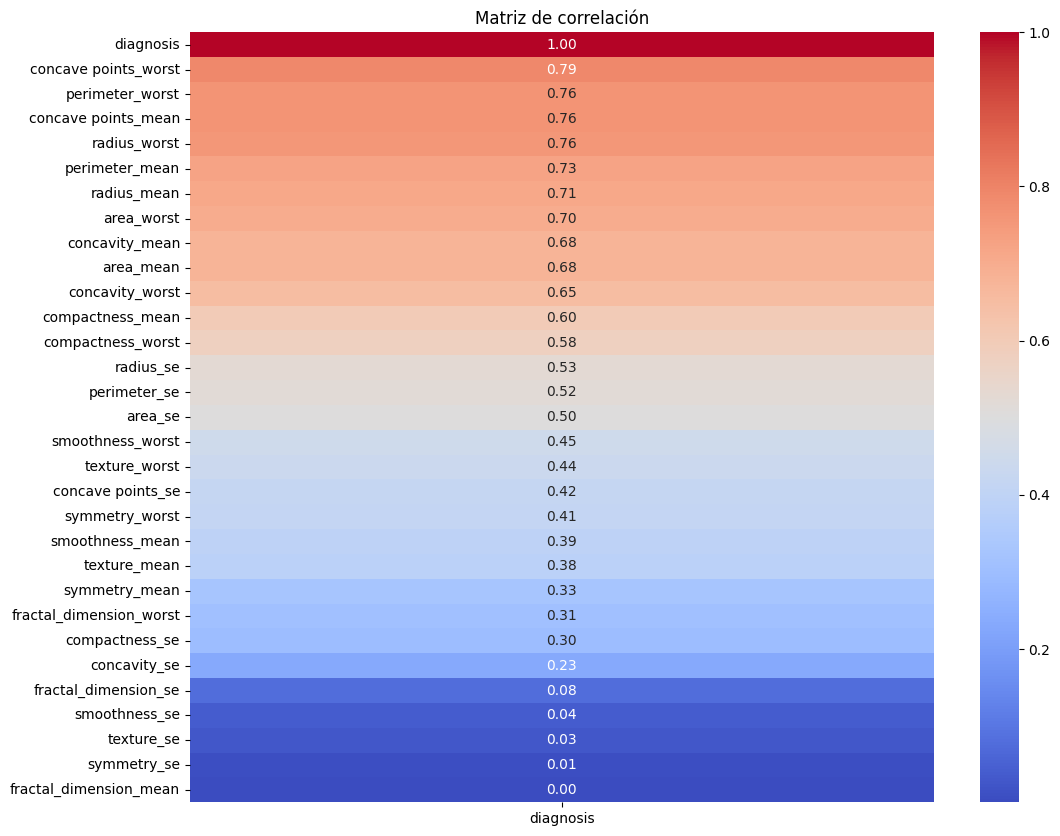

In [144]:
# Calcular la matriz de correlación
correlation_matrix = df_dea.corr()['diagnosis'].abs().sort_values(ascending=False)

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

In [145]:
X_over.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

In [146]:
#Eliminamos variables que producen colinealidad
X_over.drop(['concave points_mean','radius_worst','area_mean', 'fractal_dimension_mean'], axis=1, inplace=True) 

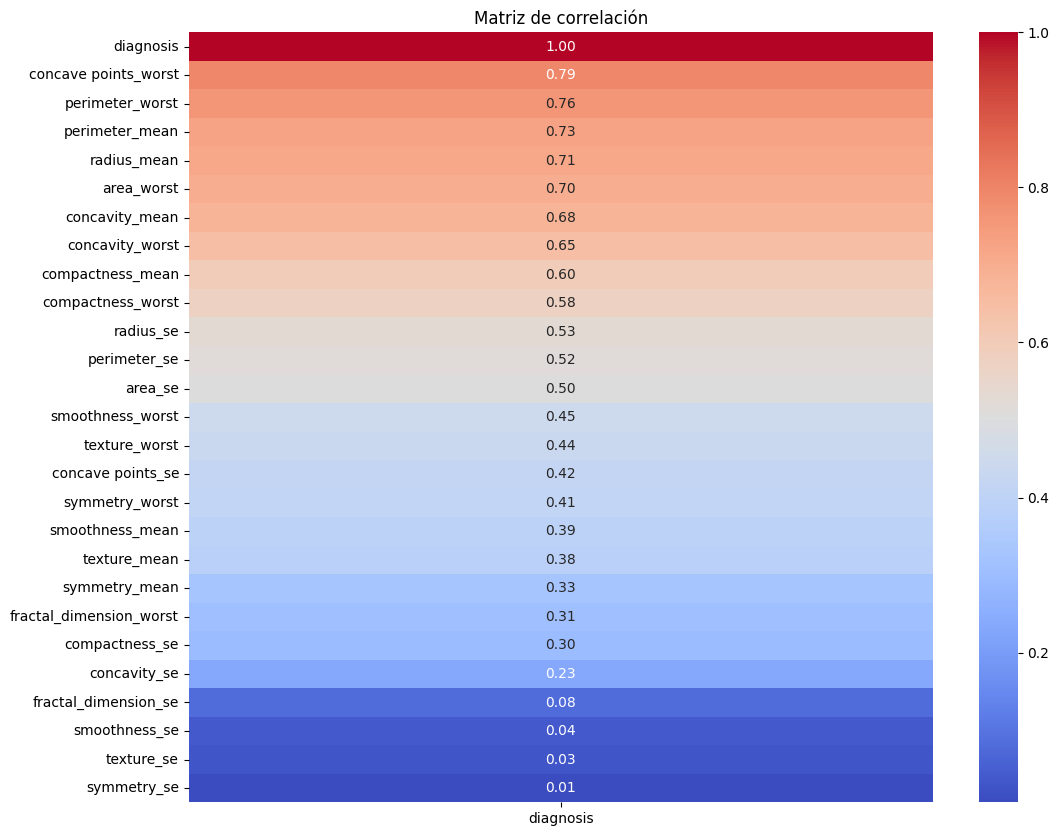

In [147]:
# Calcular la matriz de correlación
correlation_matrix = df_dea.corr()['diagnosis'].abs().sort_values(ascending=False)

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

In [148]:
#Split y escalamiento de datos
X_train, X_test, y_train , y_test = train_test_split(X_over, y_over, random_state=42, shuffle=True, test_size= .2)
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train) 
X_test = st_x.transform(X_test)

# Modelo de Regresión Logística


https://aprendeia.com/algoritmo-regresion-logistica-machine-learning-teoria/

In [150]:
#MODELO 1 CON SAMPLING RECORTADO
#lrmodel1 = LogisticRegression(random_state=42, solver='saga', multi_class='multinomial', n_jobs=-1, C=1 )
lrmodel1 = LogisticRegression(random_state=42, solver='saga', n_jobs=-1, C=1)
lrmodel1

LogisticRegression(C=1, n_jobs=-1, random_state=42, solver='saga')

In [151]:
lrmodel1.fit(X_train, y_train)
predictions=lrmodel1.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(f'Presicion de Accuracy {accuracy_score(y_test,predictions)}')
print('Precisión Regresión Logística: {}'.format(lrmodel1.score(X_train, y_train)))

[[39  0]
 [ 0 46]]
1.0
Presicion de Accuracy 1.0
Precisión Regresión Logística: 1.0


D:\Proyectos\ML\envprueba\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


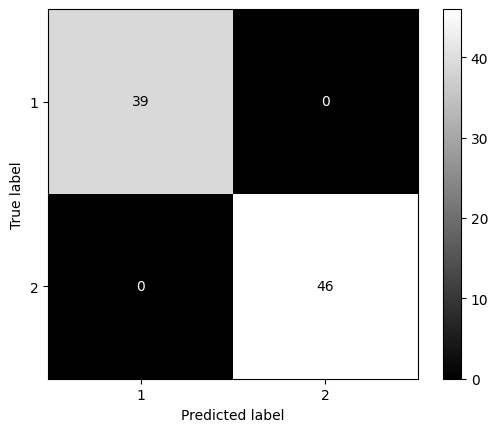

In [152]:
cm = confusion_matrix(y_test, predictions, labels=lrmodel1.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lrmodel1.classes_)
disp.plot(cmap='gray')
plt.show()

In [153]:
#Reporte de metricas
predicciones=lrmodel1.predict(X_test).reshape(-1,1)
print(classification_report(y_test,predicciones))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        46

    accuracy                           1.00        85
   macro avg       1.00      1.00      1.00        85
weighted avg       1.00      1.00      1.00        85



# MODELO 2 CON SAMPLING COMPLETADO x_rsmote, y_rsmote


In [154]:
#MODELO 2 CON SAMPLING COMPLETADO x_rsmote, y_rsmote
#Split y escalamiento de datos
y_rsmote.replace(['M', 'B'], [1,2], inplace=True)
X_train2,X_test2,y_train2,y_test2=train_test_split(x_rsmote, y_rsmote, random_state=42, shuffle=True, test_size= .2)
st_x2 = StandardScaler()
X_train2 = st_x2.fit_transform(X_train2) 
X_test2 = st_x2.transform(X_test2)

C:\Users\guido\AppData\Local\Temp\ipykernel_2304\1148631390.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_rsmote.replace(['M', 'B'], [1,2], inplace=True)


In [155]:
lrmodel2 = LogisticRegression(random_state=42, solver='saga', n_jobs=-1, C=1 )
lrmodel2

LogisticRegression(C=1, n_jobs=-1, random_state=42, solver='saga')

In [156]:
lrmodel2.fit(X_train2, y_train2)
predictions = lrmodel2.predict(X_test2)
print(confusion_matrix(y_test2,predictions))
print(accuracy_score(y_test2,predictions))
print('Precisión Regresión Logística: {}'.format(lrmodel2.score(X_train2, y_train2)))

[[73  1]
 [ 2 67]]
0.9790209790209791
Precisión Regresión Logística: 0.9842381786339754


D:\Proyectos\ML\envprueba\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


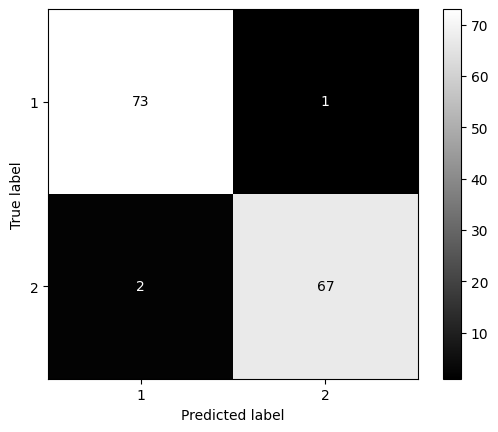

In [157]:
cm = confusion_matrix(y_test2, predictions, labels=lrmodel2.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lrmodel2.classes_)
disp.plot(cmap='gray')
plt.show()

In [158]:
#Reporte de metricas
predicciones=lrmodel2.predict(X_test2).reshape(-1,1)
print(classification_report(y_test2,predicciones))

              precision    recall  f1-score   support

           1       0.97      0.99      0.98        74
           2       0.99      0.97      0.98        69

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



# Modelo de Máquinas de Vectores de Soporte


https://aprendeia.com/maquinas-vectores-de-soporte-clasificacion-teoria/

In [159]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [160]:
#Modelo de Máquinas de Vectores de Soporte
#Create a svm Classifier
svm1 = svm.SVC(kernel='linear') # Linear Kernel
svm1

SVC(kernel='linear')

In [161]:
#Train the model using the training sets
svm1.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = svm1.predict(X_test)

In [162]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print('Precisión SVM: {}'.format(svm1.score(X_train, y_train)))

[[39  0]
 [ 0 46]]
1.0
Precisión SVM: 1.0


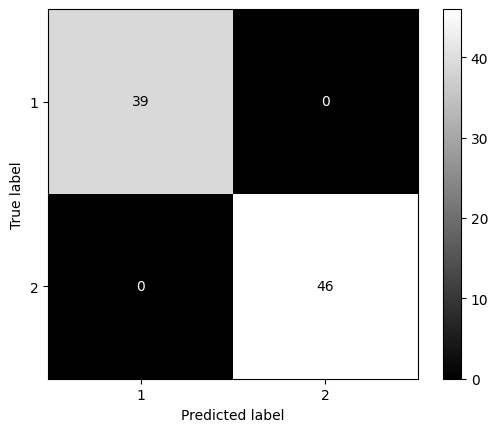

In [163]:
cm = confusion_matrix(y_test, y_pred, labels=svm1.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm1.classes_)
disp.plot(cmap='gray')
plt.show()

In [164]:
#Reporte de metricas
predicciones=svm1.predict(X_test).reshape(-1,1)
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        46

    accuracy                           1.00        85
   macro avg       1.00      1.00      1.00        85
weighted avg       1.00      1.00      1.00        85



In [165]:
#Data completa
svm2 = svm.SVC(kernel='linear') # Linear Kernel
svm2.fit(X_train2, y_train2)
y_pred2 = svm2.predict(X_test2)

In [166]:
print(confusion_matrix(y_test2,y_pred2))
print(accuracy_score(y_test2,y_pred2))
print('Precisión SVM2: {}'.format(svm2.score(X_train2, y_train2)))

[[73  1]
 [ 2 67]]
0.9790209790209791
Precisión SVM2: 0.9842381786339754


In [167]:
#Reporte de metricas MODELO SVM 2
predicciones2=svm2.predict(X_test2).reshape(-1,1)
print(classification_report(y_test2,predicciones2))

              precision    recall  f1-score   support

           1       0.97      0.99      0.98        74
           2       0.99      0.97      0.98        69

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



# KNeighborsClassifier - Modelo de Vecinos más Cercanos


https://aprendeia.com/algoritmo-k-vecinos-mas-cercanos-teoria-machine-learning/

In [168]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn

KNeighborsClassifier(n_neighbors=3)

In [169]:
y_pred = knn.predict(X_test)

In [170]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print('Precisión KNN: {}'.format(svm1.score(X_train, y_train)))

[[39  0]
 [ 0 46]]
1.0
Precisión KNN: 1.0


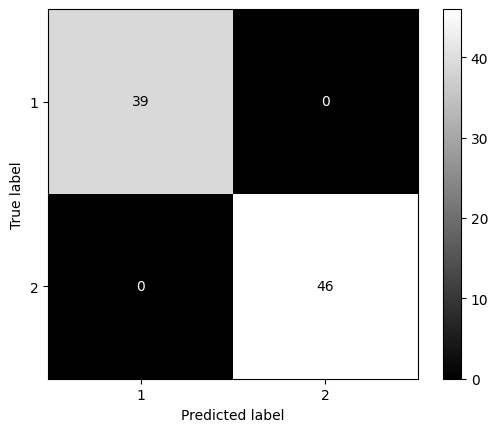

In [171]:
cm = confusion_matrix(y_test, y_pred, labels=svm1.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm1.classes_)
disp.plot(cmap='gray')
plt.show()

In [174]:
#Con toda la data
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train2, y_train2)
y_pred2 = knn2.predict(X_test2)

In [175]:
print(confusion_matrix(y_test2,y_pred2))
print(f'Accuracy {accuracy_score(y_test2,y_pred2)}')
print('Precisión KNN2: {}'.format(knn2.score(X_train2, y_train2)))

[[73  1]
 [ 5 64]]
Accuracy 0.958041958041958
Precisión KNN2: 0.9912434325744308


In [176]:
#Reporte de metricas MODELO SVM 2
predicciones3=knn2.predict(X_test2).reshape(-1,1)
print(classification_report(y_test2,predicciones3))

              precision    recall  f1-score   support

           1       0.94      0.99      0.96        74
           2       0.98      0.93      0.96        69

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



# Modelo de Árboles de Decisión Clasificación

https://aprendeia.com/arboles-de-decision-clasificacion-teoria-machine-learning/

In [177]:
# Create Decision Tree classifer object
TreeModel=DecisionTreeClassifier()
# Train Decision Tree Classifer
TreeModel=TreeModel.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = TreeModel.predict(X_test)
TreeModel

DecisionTreeClassifier()

In [178]:
print(confusion_matrix(y_test,y_pred))
print(f'Accuracy {accuracy_score(y_test,y_test)}')
print('Precisión: {}'.format(TreeModel.score(X_train, y_train)))

[[39  0]
 [ 0 46]]
Accuracy 1.0
Precisión: 1.0


In [179]:
#Con toda la data
TreeModel2=DecisionTreeClassifier()
TreeModel2=TreeModel2.fit(X_train2,y_train2)
y_pred2 = TreeModel2.predict(X_test2)

In [180]:
print(confusion_matrix(y_test2,y_pred2))
print(f'Accuracy {accuracy_score(y_test2,y_pred2)}')
print('Precisión: {}'.format(knn2.score(X_train2, y_train2)))

[[68  6]
 [ 7 62]]
Accuracy 0.9090909090909091
Precisión: 0.9912434325744308
